In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
house = pd.read_csv('/content/drive/MyDrive/INDONESIA.AI/DATASET/PROJECT 3/house predict.csv')

In [ ]:
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# EDA

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house.shape

(1460, 81)

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Missing values count
missing_values = house.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(house)) * 100

# Concatenate the count and percentage of missing values
missing_data = pd.concat([missing_values, missing_percentage], axis=1, keys=['Missing Values', 'Percentage'])
missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

,Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

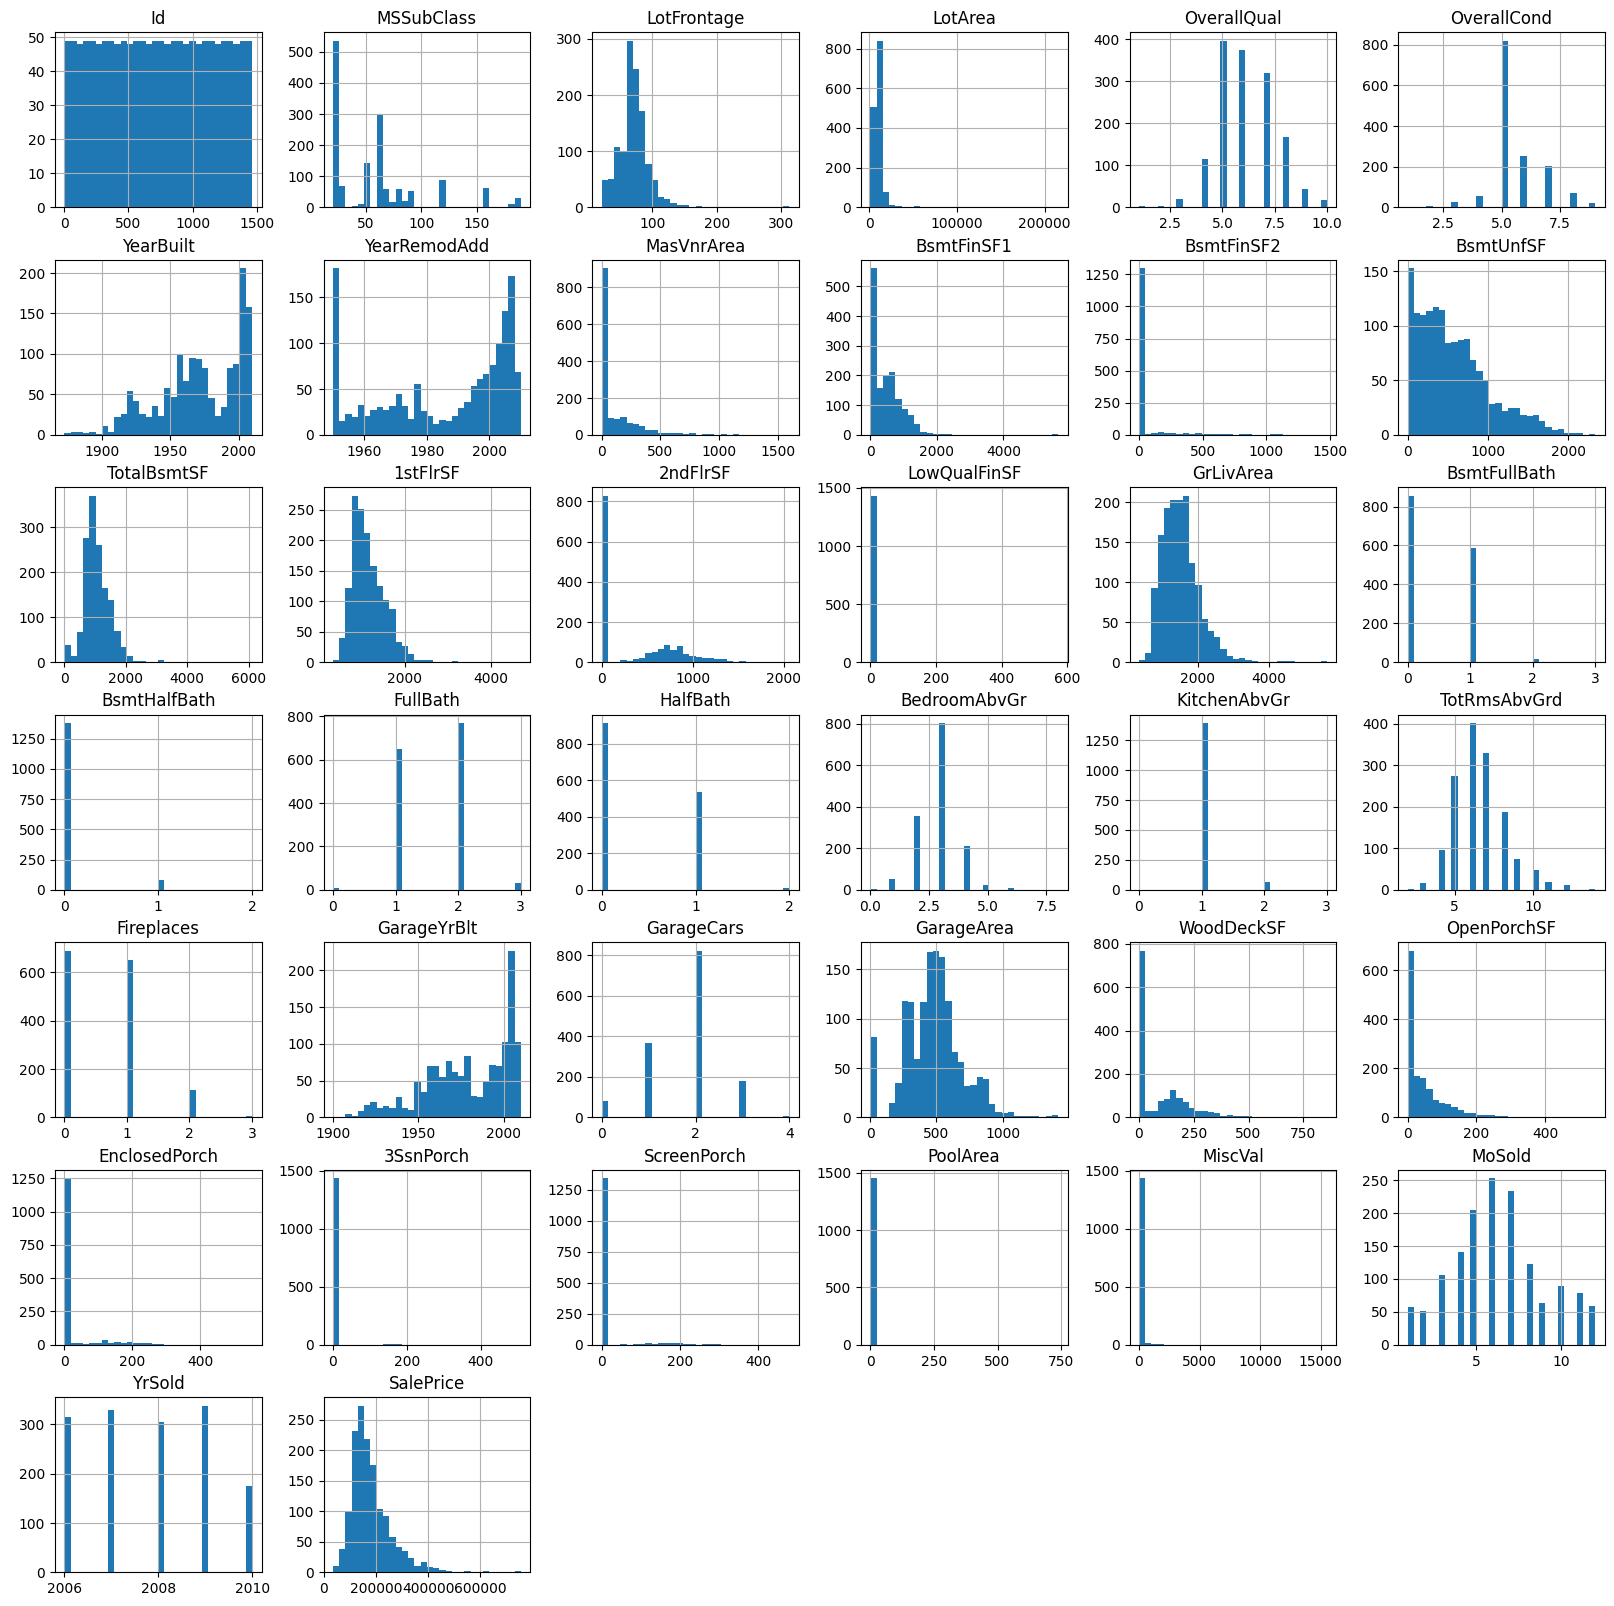

In [ ]:
# Plot histograms fitur numerik
numerical_cols = house.select_dtypes(include=['int64', 'float64']).columns
house[numerical_cols].hist(bins=30, figsize=(20, 20))
plt.show()


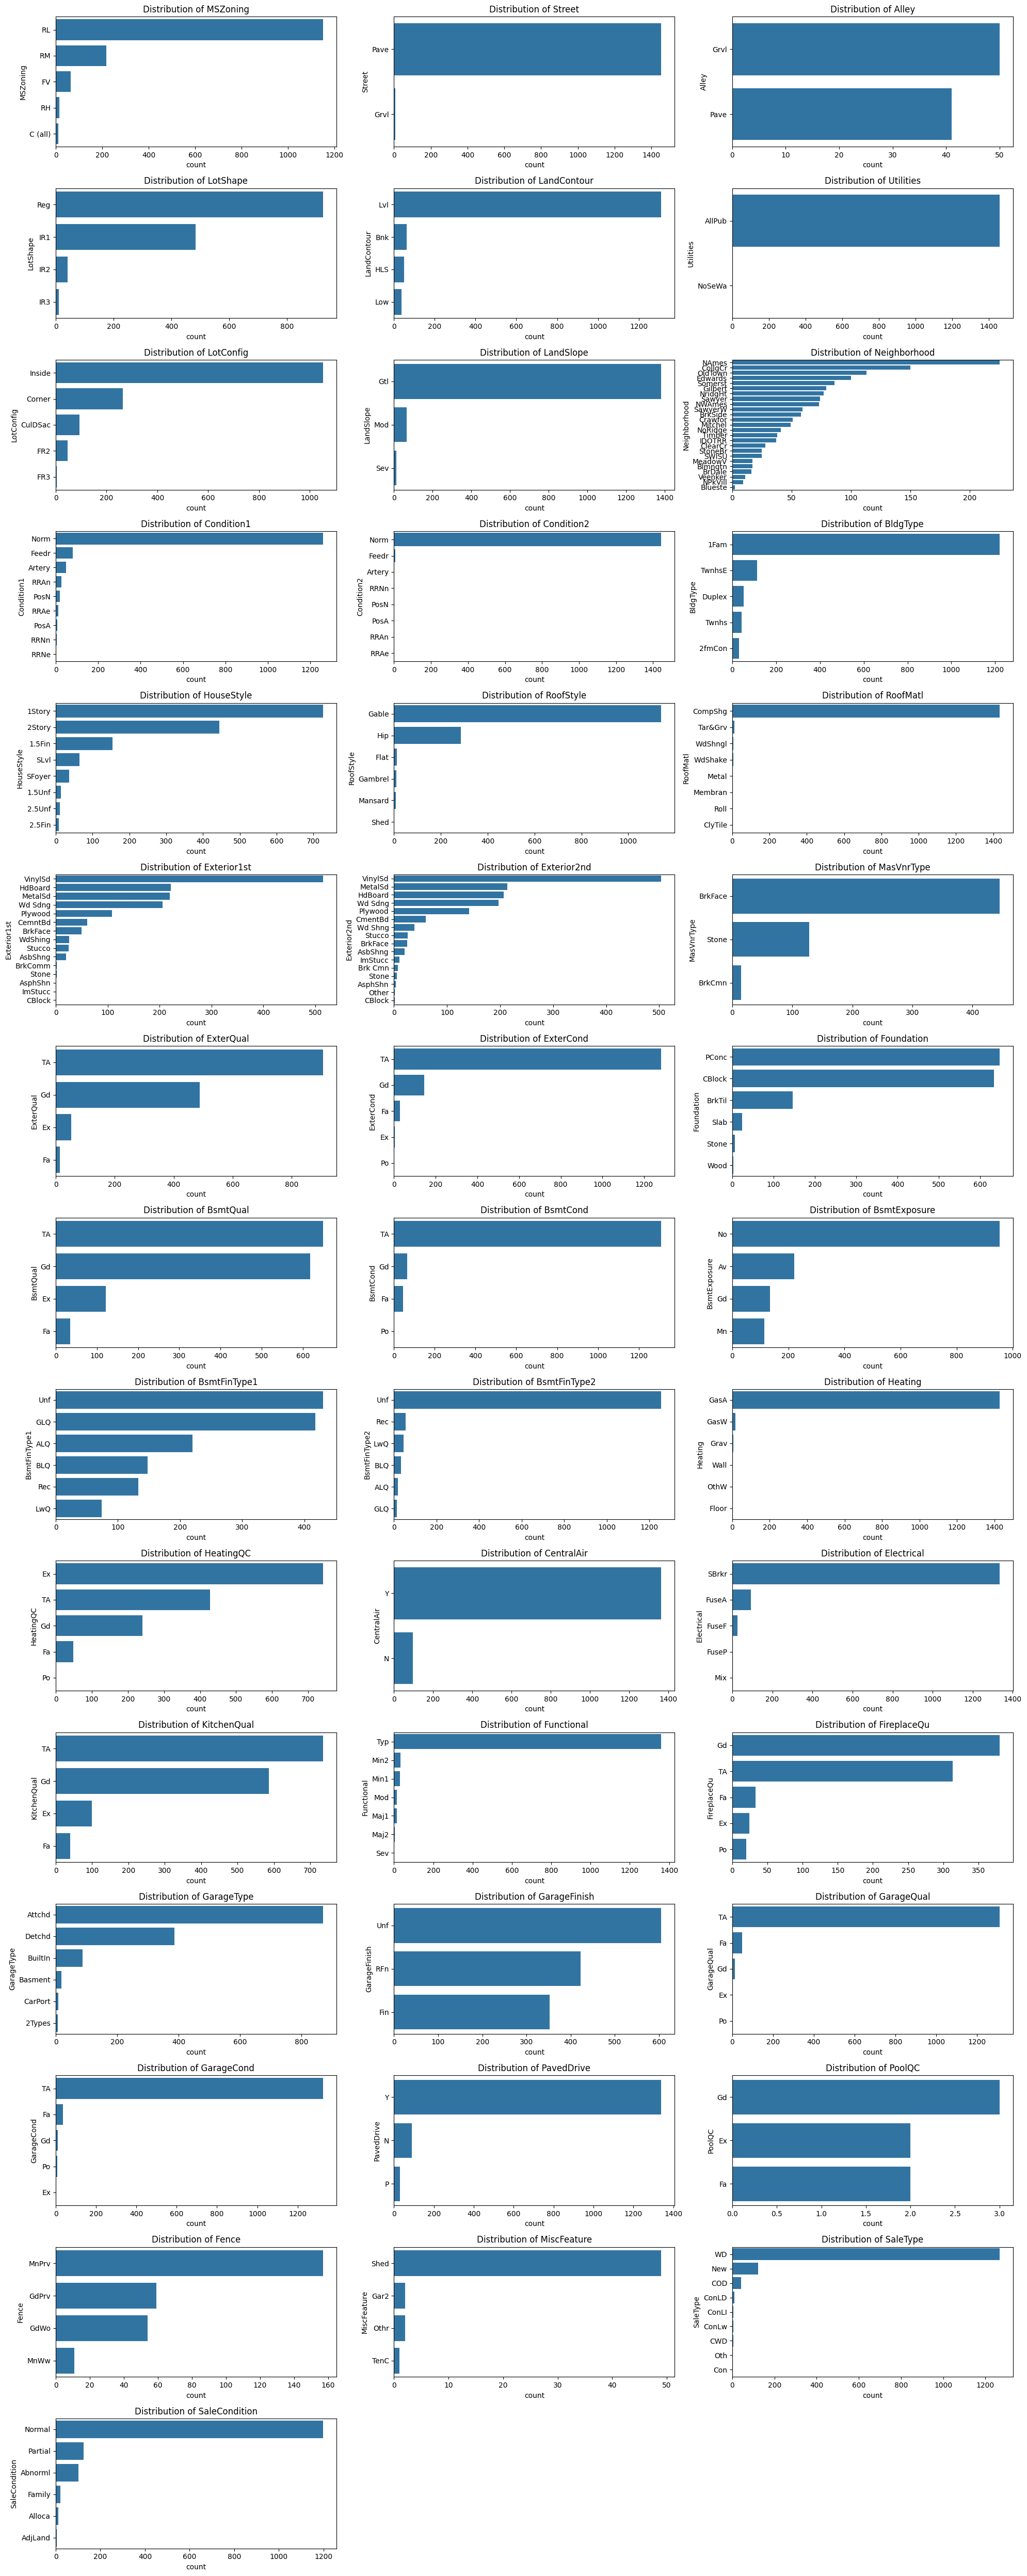

In [ ]:
# Plot fitur kategori
categorical_cols = house.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 50))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i)
    sns.countplot(y=house[col], order=house[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


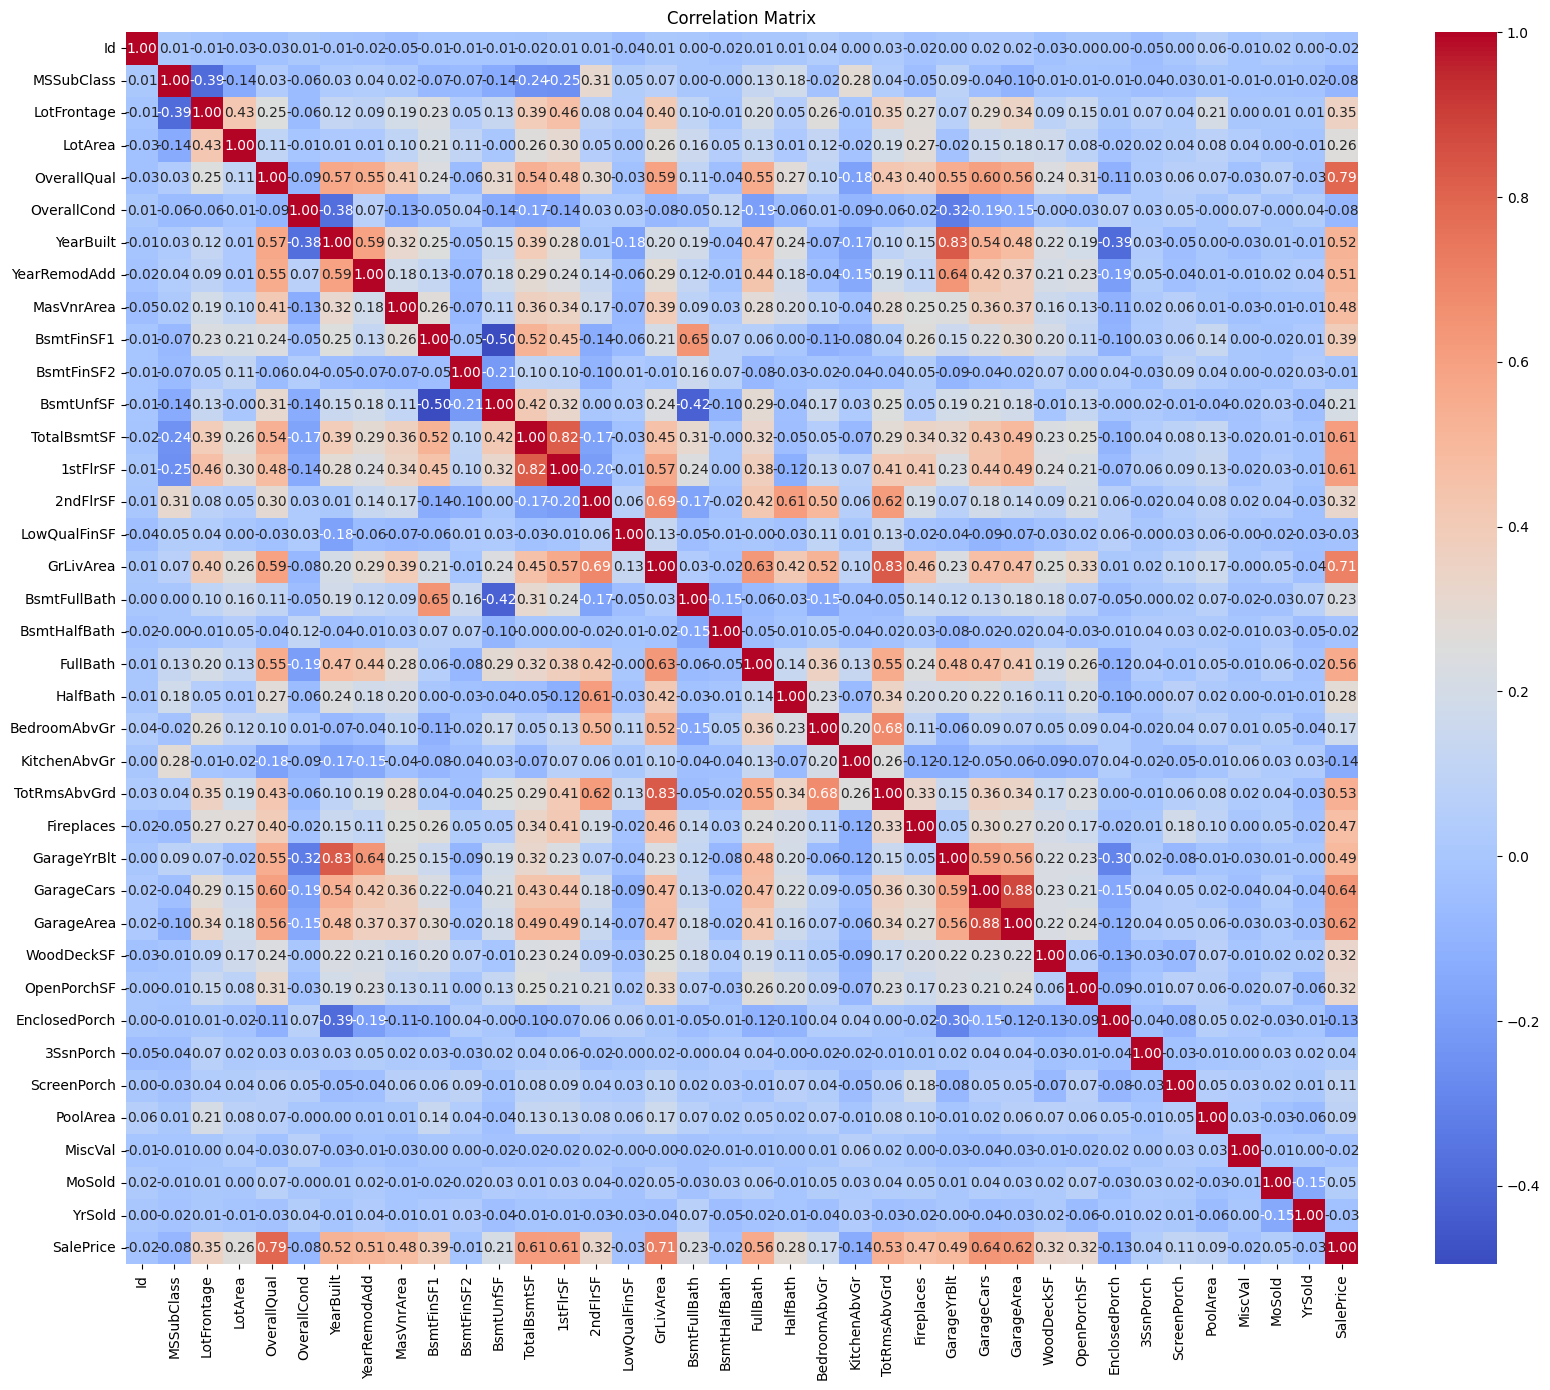

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [ ]:
#Heatmap Type Numerik
numerical_house = house.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_house.corr()

# Plot Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

# Menghitung peringkat korelasi
top_corr_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False).head(10)
print(top_corr_features)

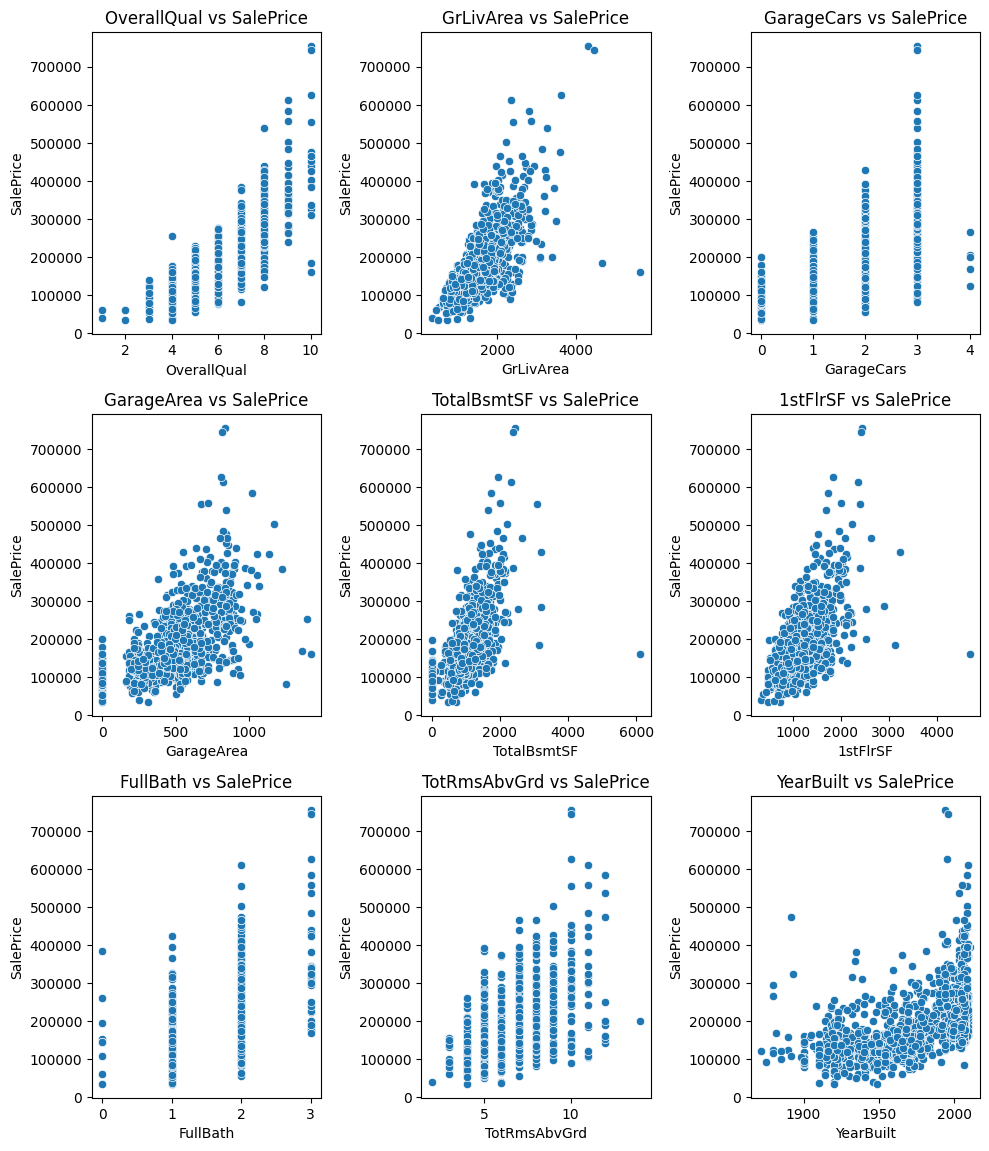

In [ ]:
# Melihat Hubungan Label dan fitur numeric yang tinggi
key_features = top_corr_features.index.drop('SalePrice')

plt.figure(figsize=(10, 15))
for i, col in enumerate(key_features, 1):
    plt.subplot(len(key_features) // 3 + 1, 3, i)
    sns.scatterplot(data=house, x=col, y='SalePrice')
    plt.title(f'{col} vs SalePrice')
    plt.tight_layout()
plt.show()


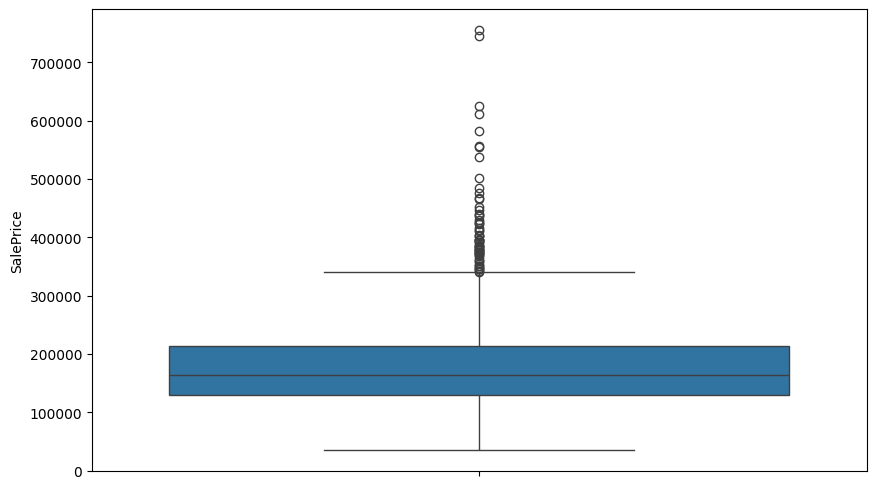

In [ ]:
# Visualisasi outliers
plt.figure(figsize=(10, 6))
sns.boxplot(house['SalePrice'])
plt.show()

# Menghapus outliers berdasarkan threshold (misalnya, 99th percentile)
threshold = house['SalePrice'].quantile(0.99)
house = house[house['SalePrice'] < threshold]

## Handling Missing Value

## Inputasi Kategori

In [ ]:
missing_values_count = house['BsmtCond'].isna().sum()
missing_values_count

37

In [ ]:
# Imputasi nilai NaN menjadi 'NA'
house['BsmtCond'] = house['BsmtCond'].fillna('NA')

<ipython-input-23-eaeca08a2d94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['BsmtCond'] = house['BsmtCond'].fillna('NA')


## Inputasi Numeric

In [ ]:
missing_values_count = house['LotFrontage'].isna().sum()
missing_values_count

258

##

In [ ]:
# Imputasi nilai NaN dengan nilai mean
house['LotFrontage'] = house['LotFrontage'].fillna(70.04)


<ipython-input-25-a8ed13118666>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['LotFrontage'] = house['LotFrontage'].fillna(70.04)


# Feature Engineering

In [ ]:
# Membuat fitur baru
house['Totalluas'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']
house['Age'] = house['YrSold'] - house['YearBuilt']
house['Remodeled'] = (house['YearBuilt'] != house['YearRemodAdd']).astype(int)

<ipython-input-28-0f25ecc6c682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Totalluas'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']
<ipython-input-28-0f25ecc6c682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['Age'] = house['YrSold'] - house['YearBuilt']
<ipython-input-28-0f25ecc6c682>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
# Membuat Fitur Interaksi
house['OverallQual_OverallCond'] = house['OverallQual'] * house['OverallCond']
house['GrLivArea_OverallQual'] = house['GrLivArea'] * house['OverallQual']

<ipython-input-66-6c7aca3e0334>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['OverallQual_OverallCond'] = house['OverallQual'] * house['OverallCond']
<ipython-input-66-6c7aca3e0334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['GrLivArea_OverallQual'] = house['GrLivArea'] * house['OverallQual']


In [ ]:
print(house['Remodeled'].unique())

[0 1]


In [ ]:
# Inspeksi beberapa baris data untuk memverifikasi hasil pembuatan fitur
print(house[['YrSold', 'YearBuilt', 'Age']].head(20))


    YrSold  YearBuilt  Age
0     2008       2003    5
1     2007       1976   31
2     2008       2001    7
3     2006       1915   91
4     2008       2000    8
5     2009       1993   16
6     2007       2004    3
7     2009       1973   36
8     2008       1931   77
9     2008       1939   69
10    2008       1965   43
11    2006       2005    1
12    2008       1962   46
13    2007       2006    1
14    2008       1960   48
15    2007       1929   78
16    2010       1970   40
17    2006       1967   39
18    2008       2004    4
19    2009       1958   51


In [ ]:
# Split data numerical dan categorical
num_cols = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageCars', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'Totalluas', 'Age', 'Remodeled', 'LotFrontage', 'OverallQual_OverallCond', 'GrLivArea_OverallQual']
cat_cols = ['Neighborhood', 'KitchenQual', 'MSZoning', 'Utilities','BldgType','Heating','KitchenQual','SaleCondition','LandSlope', 'BsmtCond']

num = house[num_cols].copy()
cat = house[cat_cols].copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One hot encoding untuk data categorical
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat = encoder.fit_transform(cat)

In [ ]:
#Concatenate data numerical dan categorical
X = np.hstack((num, cat)) # Assign the concatenated data to variable X
y = house['SalePrice'].values.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# Cek data hasil preprocessing
encoded_feature_names = encoder.get_feature_names_out(cat_cols)
feature_names = np.append(num_cols, encoded_feature_names)
feature_df = pd.DataFrame(X_train, columns=feature_names)
process_df = pd.concat([feature_df, house[['SalePrice']]], axis=1)
process_df

,OverallQual,GrLivArea,YearBuilt,GarageCars,GarageArea,FullBath,TotRmsAbvGrd,Totalluas,Age,Remodeled,...,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,SalePrice
0,5.0,1362.0,1993.0,2.0,480.0,1.0,5.0,2158.0,16.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,208500.0
1,6.0,1322.0,1974.0,2.0,440.0,2.0,6.0,2177.0,35.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,181500.0
2,7.0,2353.0,1980.0,2.0,484.0,2.0,10.0,3198.0,29.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,223500.0
3,6.0,1855.0,1976.0,2.0,512.0,2.0,7.0,2383.0,31.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140000.0
4,6.0,1218.0,1941.0,2.0,440.0,1.0,6.0,1953.0,66.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175000.0
1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210000.0
1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266500.0
1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142125.0


### Mengecek nilai yang digunakan pada data train

In [ ]:
# Menghitung nilai rata-rata (mean) dari kolom 'LotFrontage'
mean_value = house['LotFrontage'].mean()
mean_value

69.78984083044982

### uji coba

# Modeling


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
# Function to evaluate hyperparameters
def evaluate_hyperparameters(model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

# Define parameter grid for each model
param_grids = {
    "Linear Regression": {},
    "Ridge Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "Lasso Regression": {"alpha": [0.01, 0.1, 1, 10, 100]},
    "Random Forest": {"n_estimators": [100, 200, 300], "max_depth": [3, 5, 10]},
    "Gradient Boosting": {"n_estimators": [100, 200, 300], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 4, 5]},
    "XGBoost": {"n_estimators": [100, 200, 300], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 4, 5]}
}

# Define models to be tested
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}


In [ ]:
# Evaluate hyperparameters for each model
best_params = {}
for name, model in models.items():
    best_params[name] = evaluate_hyperparameters(model, param_grids[name])

# Prepare a table to store results with hyperparameter tuning
results_with_tuning = pd.DataFrame(columns=["Model", "Best Parameters", "MAE", "MSE", "RMSE", "R-squared"])

# Train and test the model with the best hyperparameters
for name, model in models.items():
    model.set_params(**best_params[name])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    result = pd.DataFrame({
        "Model": [name],
        "Best Parameters": [best_params[name]],
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R-squared": [r2]
    })
    results_with_tuning = pd.concat([results_with_tuning, result], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.186e+11, tolerance: 4.295e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.174e+11, tolerance: 4.316e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.723e+11, tolerance: 4.293e

In [ ]:
print("Results with Hyperparameter Tuning:")
print(results_with_tuning)


Results with Hyperparameter Tuning:
               Model                                    Best Parameters  \
0  Linear Regression                                                 {}   
1   Ridge Regression                                       {'alpha': 1}   
2   Lasso Regression                                      {'alpha': 10}   
3      Random Forest             {'max_depth': 10, 'n_estimators': 100}   
4  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   
5            XGBoost  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...   

            MAE           MSE          RMSE  R-squared  
0  18520.943295  6.712738e+08  25908.952053   0.873991  
1  18383.637030  6.647166e+08  25782.097546   0.875222  
2  18401.891554  6.681554e+08  25848.702133   0.874577  
3  17250.841247  5.787109e+08  24056.411646   0.891367  
4  16305.602069  5.381422e+08  23197.892565   0.898982  
5  16359.678525  5.404823e+08  23248.275142   0.898543  


In [ ]:
# Evaluate hyperparameters for each model
best_params = {}
for name, model in models.items():
    print(f"Evaluating hyperparameters for {name}") # Add this line to see progress and potential errors
    best_params[name] = evaluate_hyperparameters(model, param_grids[name])

Evaluating hyperparameters for Linear Regression
Evaluating hyperparameters for Ridge Regression
Evaluating hyperparameters for Lasso Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.186e+11, tolerance: 4.295e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.174e+11, tolerance: 4.316e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.723e+11, tolerance: 4.293e

Evaluating hyperparameters for Random Forest
Evaluating hyperparameters for Gradient Boosting
Evaluating hyperparameters for XGBoost


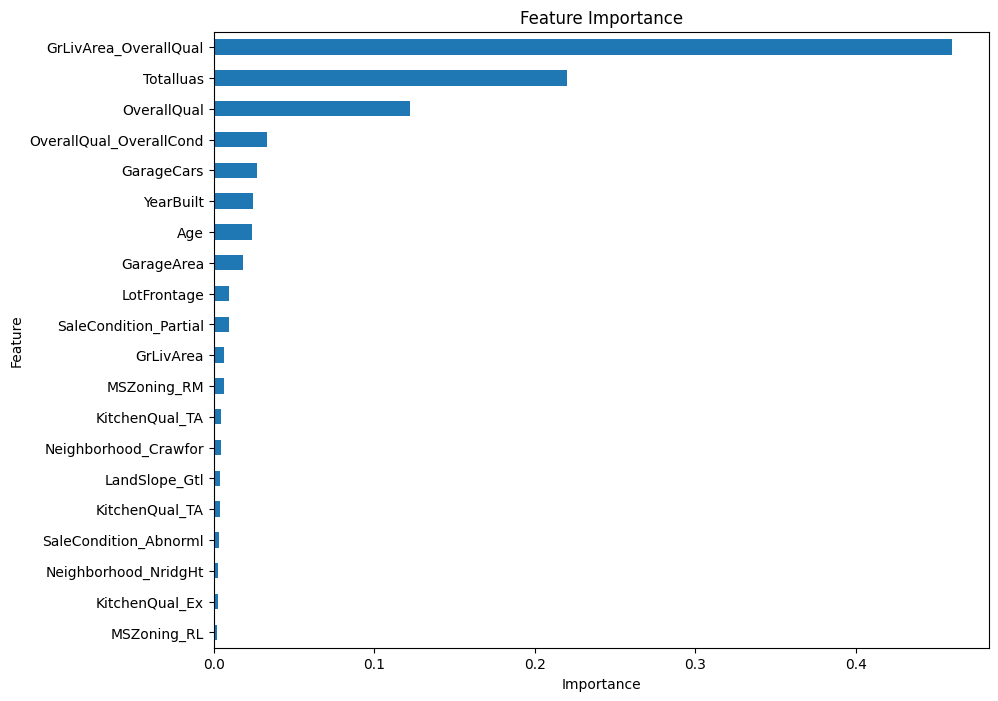

In [ ]:
# Plot Feature Importances
model_name = "Gradient Boosting"  # Replace with the desired model name
model = models[model_name]
model.set_params(**best_params[model_name])
model.fit(X_train, y_train)

# Get feature importances
importance_scores = model.feature_importances_
indices = np.argsort(importance_scores)

# Get feature names
feature_names = feature_names

# Plot the feature importances
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(importance_scores, index=feature_names)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()